In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)


(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)
for i in range(20):
    print(Y_train[i])

(9000, 32, 32, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


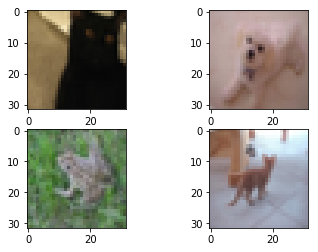

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 256
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
       
    model.add(Flatten())
    
   
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update yo

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 21.9905 - acc: 0.4203 - val_loss: 14.2720 - val_acc: 0.5827
Epoch 2/100
 - 2s - loss: 9.7163 - acc: 0.5777 - val_loss: 6.0632 - val_acc: 0.5457
Epoch 3/100
 - 2s - loss: 4.5717 - acc: 0.6168 - val_loss: 3.8061 - val_acc: 0.5780
Epoch 4/100
 - 2s - loss: 2.8853 - acc: 0.6334 - val_loss: 2.4432 - val_acc: 0.5767
Epoch 5/100
 - 2s - loss: 2.1004 - acc: 0.6582 - val_loss: 2.0319 - val_acc: 0.5957
Epoch 6/100
 - 2s - loss: 1.9848 - acc: 0.6677 - val_loss: 1.7918 - val_acc: 0.6413
Epoch 7/100
 - 2s - loss: 1.6542 - acc: 0.6892 - val_loss: 1.6214 - val_acc: 0.6217
Epoch 8/100
 - 2s - loss: 1.5043 - acc: 0.6864 - val_loss: 1.5370 - val_acc: 0.6413
Epoch 9/100
 - 2s - loss: 1.4585 - acc: 0.7064 - val_loss: 1.5481 - val_acc: 0.6487
Epoch 10/100
 - 2s - loss: 1.5216 - acc: 0.7064 - val_loss: 1.5184 - val_acc: 0.6720
Epoch 11/100
 - 2s - loss: 1.4823 - acc: 0.7212 - val_loss: 1.5323 - val_acc: 0.6373
Epoch 12/100
 - 2s - lo

Epoch 97/100
 - 2s - loss: 0.5241 - acc: 0.9687 - val_loss: 1.6567 - val_acc: 0.7130
Epoch 98/100
 - 2s - loss: 0.4000 - acc: 0.9711 - val_loss: 1.6526 - val_acc: 0.7013
Epoch 99/100
 - 2s - loss: 0.3544 - acc: 0.9774 - val_loss: 1.4884 - val_acc: 0.6963
Epoch 100/100
 - 2s - loss: 0.4204 - acc: 0.9741 - val_loss: 1.5677 - val_acc: 0.7053
3000/3000 [==============================] - 1s 184us/step

Test Accuracy: 0.8113


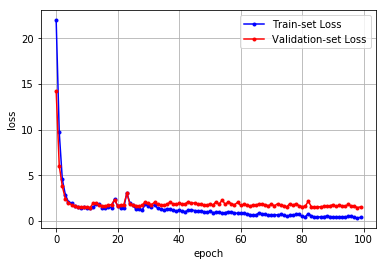

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 9s - loss: 22.1907 - acc: 0.4282 - val_loss: 14.9939 - val_acc: 0.5450
Epoch 2/100
 - 2s - loss: 9.9977 - acc: 0.5859 - val_loss: 6.1730 - val_acc: 0.5610
Epoch 3/100
 - 2s - loss: 4.6854 - acc: 0.6229 - val_loss: 3.5395 - val_acc: 0.6120
Epoch 4/100
 - 2s - loss: 2.9328 - acc: 0.6439 - val_loss: 2.6798 - val_acc: 0.5753
Epoch 5/100
 - 2s - loss: 2.2709 - acc: 0.6587 - val_loss: 2.2192 - val_acc: 0.5563
Epoch 6/100
 - 2s - loss: 1.9903 - acc: 0.6612 - val_loss: 1.8770 - val_acc: 0.6183
Epoch 7/100
 - 2s - loss: 2.0551 - acc: 0.6719 - val_loss: 1.9831 - val_acc: 0.6337
Epoch 8/100
 - 2s - loss: 1.7414 - acc: 0.6904 - val_loss: 1.6795 - val_acc: 0.6447
Epoch 9/100
 - 2s - loss: 1.6043 - acc: 0.7054 - val_loss: 1.5934 - val_acc: 0.6570
Epoch 10/100
 - 2s - loss: 1.5898 - acc: 0.7139 - val_loss: 1.6418 - val_acc: 0.6330
Epoch 11/100
 - 2s - loss: 1.4654 - acc: 0.7209 - val_loss: 1.6166 - val_acc: 0.6373
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.5284 - acc: 0.9688 - val_loss: 1.8619 - val_acc: 0.7003
Epoch 98/100
 - 2s - loss: 0.4640 - acc: 0.9716 - val_loss: 1.6582 - val_acc: 0.6993
Epoch 99/100
 - 2s - loss: 0.4946 - acc: 0.9661 - val_loss: 1.6924 - val_acc: 0.6923
Epoch 100/100
 - 2s - loss: 0.5078 - acc: 0.9652 - val_loss: 1.8013 - val_acc: 0.6853
3000/3000 [==============================] - 1s 172us/step

Test Accuracy: 0.7810


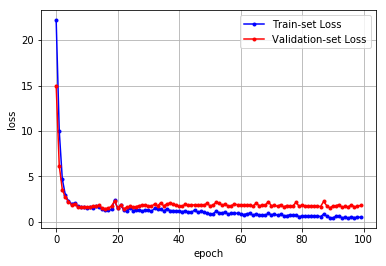

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 9s - loss: 22.1394 - acc: 0.4302 - val_loss: 14.4328 - val_acc: 0.5903
Epoch 2/100
 - 2s - loss: 9.7903 - acc: 0.5954 - val_loss: 6.1494 - val_acc: 0.5203
Epoch 3/100
 - 2s - loss: 4.5488 - acc: 0.6147 - val_loss: 3.9545 - val_acc: 0.4990
Epoch 4/100
 - 2s - loss: 2.9578 - acc: 0.6373 - val_loss: 2.9023 - val_acc: 0.5240
Epoch 5/100
 - 2s - loss: 2.4133 - acc: 0.6442 - val_loss: 2.3444 - val_acc: 0.5643
Epoch 6/100
 - 2s - loss: 1.9397 - acc: 0.6559 - val_loss: 1.8467 - val_acc: 0.5987
Epoch 7/100
 - 2s - loss: 1.8098 - acc: 0.6790 - val_loss: 1.7790 - val_acc: 0.6483
Epoch 8/100
 - 2s - loss: 1.6324 - acc: 0.6999 - val_loss: 1.6974 - val_acc: 0.6447
Epoch 9/100
 - 2s - loss: 1.5370 - acc: 0.7057 - val_loss: 1.8938 - val_acc: 0.5780
Epoch 10/100
 - 2s - loss: 1.6235 - acc: 0.7141 - val_loss: 1.5275 - val_acc: 0.6600
Epoch 11/100
 - 2s - loss: 1.5961 - acc: 0.7319 - val_loss: 1.7476 - val_acc: 0.6433
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.4585 - acc: 0.9728 - val_loss: 1.6864 - val_acc: 0.6920
Epoch 98/100
 - 2s - loss: 0.5167 - acc: 0.9642 - val_loss: 1.7458 - val_acc: 0.6780
Epoch 99/100
 - 2s - loss: 0.4528 - acc: 0.9723 - val_loss: 1.5234 - val_acc: 0.6843
Epoch 100/100
 - 2s - loss: 0.4851 - acc: 0.9709 - val_loss: 1.6718 - val_acc: 0.6870
3000/3000 [==============================] - 1s 173us/step

Test Accuracy: 0.7627


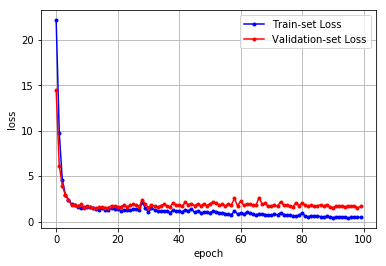

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 9s - loss: 21.7998 - acc: 0.4227 - val_loss: 14.7090 - val_acc: 0.5273
Epoch 2/100
 - 2s - loss: 9.4707 - acc: 0.6008 - val_loss: 5.7970 - val_acc: 0.5910
Epoch 3/100
 - 2s - loss: 4.4973 - acc: 0.6213 - val_loss: 3.7133 - val_acc: 0.5303
Epoch 4/100
 - 2s - loss: 2.8577 - acc: 0.6376 - val_loss: 2.4242 - val_acc: 0.6147
Epoch 5/100
 - 2s - loss: 2.3326 - acc: 0.6582 - val_loss: 2.1883 - val_acc: 0.5993
Epoch 6/100
 - 2s - loss: 2.0070 - acc: 0.6729 - val_loss: 1.8478 - val_acc: 0.6493
Epoch 7/100
 - 2s - loss: 1.8396 - acc: 0.6851 - val_loss: 1.8361 - val_acc: 0.6043
Epoch 8/100
 - 2s - loss: 1.6172 - acc: 0.6966 - val_loss: 1.7681 - val_acc: 0.6080
Epoch 9/100
 - 2s - loss: 1.6290 - acc: 0.7037 - val_loss: 1.8024 - val_acc: 0.6390
Epoch 10/100
 - 2s - loss: 1.6250 - acc: 0.7200 - val_loss: 1.7435 - val_acc: 0.6087
Epoch 11/100
 - 2s - loss: 1.6471 - acc: 0.7257 - val_loss: 1.9617 - val_acc: 0.6163
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.4821 - acc: 0.9710 - val_loss: 1.6296 - val_acc: 0.6907
Epoch 98/100
 - 2s - loss: 0.4890 - acc: 0.9691 - val_loss: 1.6241 - val_acc: 0.7020
Epoch 99/100
 - 2s - loss: 0.4852 - acc: 0.9678 - val_loss: 1.6518 - val_acc: 0.7047
Epoch 100/100
 - 2s - loss: 0.4426 - acc: 0.9729 - val_loss: 1.5943 - val_acc: 0.7107
3000/3000 [==============================] - 1s 170us/step

Test Accuracy: 0.7853


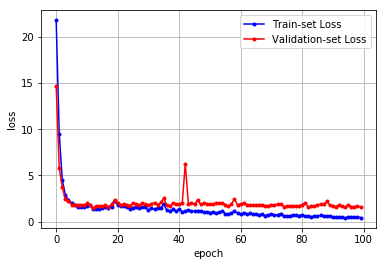

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 9s - loss: 21.4344 - acc: 0.4377 - val_loss: 13.3471 - val_acc: 0.5823
Epoch 2/100
 - 2s - loss: 8.7952 - acc: 0.5944 - val_loss: 5.4625 - val_acc: 0.5063
Epoch 3/100
 - 2s - loss: 4.1050 - acc: 0.6249 - val_loss: 3.2023 - val_acc: 0.5097
Epoch 4/100
 - 2s - loss: 2.6772 - acc: 0.6428 - val_loss: 2.3993 - val_acc: 0.6037
Epoch 5/100
 - 2s - loss: 2.1894 - acc: 0.6527 - val_loss: 2.0375 - val_acc: 0.5983
Epoch 6/100
 - 2s - loss: 1.9519 - acc: 0.6640 - val_loss: 1.9416 - val_acc: 0.6090
Epoch 7/100
 - 2s - loss: 1.7576 - acc: 0.6832 - val_loss: 1.7970 - val_acc: 0.6410
Epoch 8/100
 - 2s - loss: 1.9999 - acc: 0.6826 - val_loss: 1.8159 - val_acc: 0.6577
Epoch 9/100
 - 2s - loss: 1.5661 - acc: 0.6997 - val_loss: 1.5699 - val_acc: 0.6357
Epoch 10/100
 - 2s - loss: 1.4675 - acc: 0.7186 - val_loss: 1.4579 - val_acc: 0.6673
Epoch 11/100
 - 2s - loss: 1.5093 - acc: 0.7170 - val_loss: 1.8206 - val_acc: 0.6030
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.5335 - acc: 0.9706 - val_loss: 1.6912 - val_acc: 0.6847
Epoch 98/100
 - 2s - loss: 0.4819 - acc: 0.9737 - val_loss: 1.5879 - val_acc: 0.6910
Epoch 99/100
 - 2s - loss: 0.4902 - acc: 0.9682 - val_loss: 1.5634 - val_acc: 0.6923
Epoch 100/100
 - 2s - loss: 0.4078 - acc: 0.9770 - val_loss: 1.6179 - val_acc: 0.6937
3000/3000 [==============================] - 1s 172us/step

Test Accuracy: 0.7840


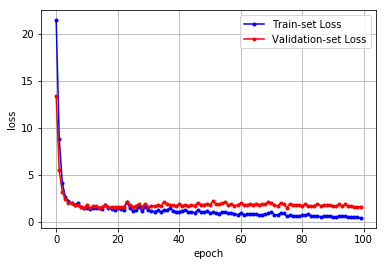

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_13/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=256, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [17]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_13/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.70 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99666667 0.99688889 0.997      0.99744444 0.99688889]
Validation Acc: [0.713      0.713      0.71966667 0.71066667 0.71266667]
Test Acc: [0.77533333 0.77366667 0.79766667 0.78533333 0.803     ]
[ True  True  True  True  True]


In [18]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_13/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 24.83%
Ensemble Validation_Accuracy: 75.17%
Ensemble Test_Error: 16.03%
Ensemble Test_Accuracy: 83.97%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_13/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])